# PROJEKT V: Customer Personality Analysis and Clusterization

This project will use a dataset with a company’s ideal customers attributes. The dataset consists of the costumers basics information, including ID, birth year, education, marriage status and income. In this project my interest is try to understand the costumer profile and analyze their behavior. Being capable of clustering costumers by their interests is great to make products based on their expectations, allowing a further analysis on product mix. Considering that, i'll cluster costumers based on their similarities and them show what to focus based on each cluster. 

            key features: EDA, Data Visualization, Pyplot, Clusterization, K-Means.

#### Objectives:

   * EDA
   * Interactive plots with Plotly

   
#### Phases:
   * Data Preparation
   * Feature Engeneering
   * Data Analysis and Vizualization
   * K-Means Clustering
   * Graphics & Results

### DataSet Atributes

The dataset atributes are well defined as following

##### People

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if customer complained in the last 2 years, 0 otherwise

##### Products

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

##### Promotion

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

##### Place

* NumWebPurchases: Number of purchases made through the company’s web site
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s web site in the last month



In [1]:
#lib imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import squarify

#SKLearn
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline

#load dataset
df = pd.read_csv('Customer Personality Analysis.csv', sep='\t')

As usual, lets look for the DataFrame features and if there is any null value

In [2]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### Data Preparation

<AxesSubplot:>

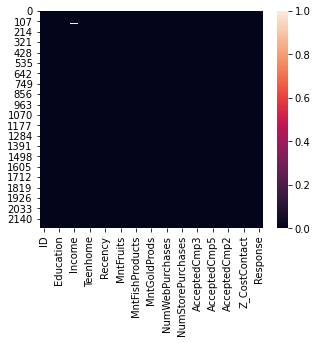

In [5]:
#heatmap null values
fig, ax = plt.subplots(figsize = (5, 4))
sns.heatmap(data = df.isnull())

First lets deal with the null values in the Income column

<AxesSubplot:>

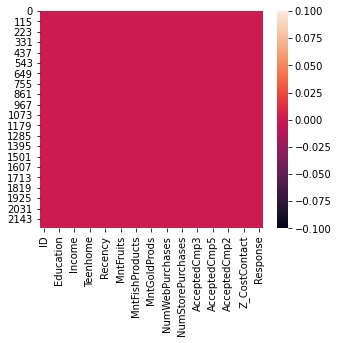

In [6]:
#drop null values
df = df.dropna()

#plot heatmap
fig, ax = plt.subplots(figsize = (5, 4))
sns.heatmap(data = df.isnull())

In [7]:
#Check Marital values
df['Marital_Status'].value_counts()

#Remove Alone, Yolo and Absurd values
df = df[df['Marital_Status'] != 'YOLO']
df = df[df['Marital_Status'] != 'Absurd']
df = df[df['Marital_Status'] != 'Alone']

In [8]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Name: Marital_Status, dtype: int64

Done, now lets see age and income disparities and remove it

<AxesSubplot:xlabel='Income', ylabel='Year_Birth'>

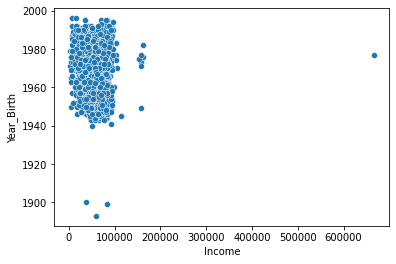

In [9]:
sns.scatterplot(data = df, x = 'Income', y = 'Year_Birth')

In [10]:
#remove age disparity
df = df[df['Year_Birth'] > 1920]
#remove income disparity
df = df[df['Income'] < 600000]

 ### Feature Engeneering

Lets make new columns.

* Transform the Dt_Costumer in a datastamp format, them take the age of client out of Date of Birth.
* Define number of depedents in the house
* Define number of purchases considering all shop sales channels
* Total amount spent
* Total number of promotions taken




In [11]:
#transform in datetime
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

#make the age column
year = pd.Timestamp.today().year
df["Age"] = year - df["Year_Birth"]


In [12]:
#number of dependents
df['Dependents'] = df['Kidhome'] + df['Teenhome']

#family size
df['Family'] = df['Dependents'] + df['Marital_Status'].replace({
    'Married': 2,
    'Together': 2,
    'Single': 1,
    'Divorced': 1,
    'Widow': 1})

In [13]:
#Total number of purchases considering all shop sites
df['Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
#Total amount spent
df['Spents'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
#Total promotions taken
df['Promotions'] = df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2']


In [14]:
#Remove useless columns
drops = ['ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer']
df = df.drop(drops, axis = 1)

In [15]:
#look for categorical variables
obj = (df.dtypes == 'object')
list(obj[obj].index)

['Education', 'Marital_Status']

In [16]:
#make numerical dataset
df_num = df
#Label Encode both
LE = LabelEncoder()
obj_cols = list(obj[obj].index)

for i in obj_cols:
    df_num[i]=df_num[[i]].apply(LE.fit_transform)
df_num.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Dependents,Family,Purchases,Spents,Promotions
0,2,2,58138.0,0,0,58,635,88,546,172,...,0,0,0,1,64,0,1,25,1617,0
1,2,2,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,67,2,3,6,27,0
2,2,3,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,56,0,2,21,776,0
3,2,3,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,37,1,3,8,53,0
4,4,1,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,40,1,3,19,422,0


In [17]:
#drop unused columns
drops = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']
df_num = df_num.drop(drops, axis = 1)

We will use RandomForestImportance as a Feature Selection Technique

 ### EDA and Data Visualization

What to do now:

 * Seek correlations
 * Make Graphs
 * Look for possible clusters

Text(0.5, 1.0, 'Correlation Matrix')

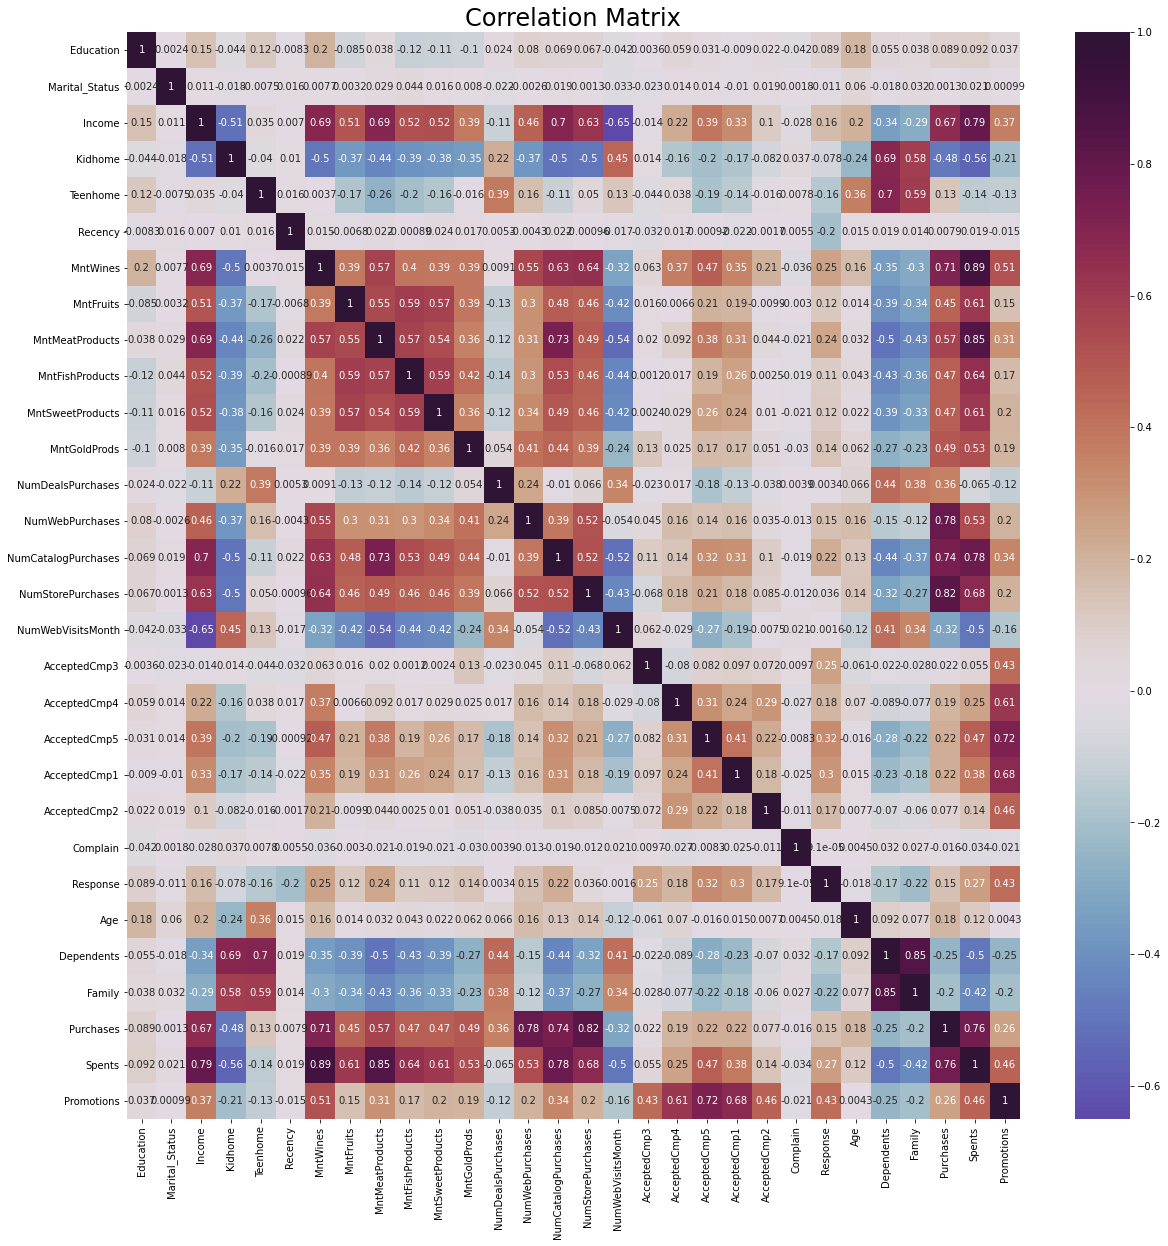

In [18]:
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_corr, annot = True, center = 0, cmap = 'twilight_shifted')
ax.set_title('Correlation Matrix', fontsize = 24)

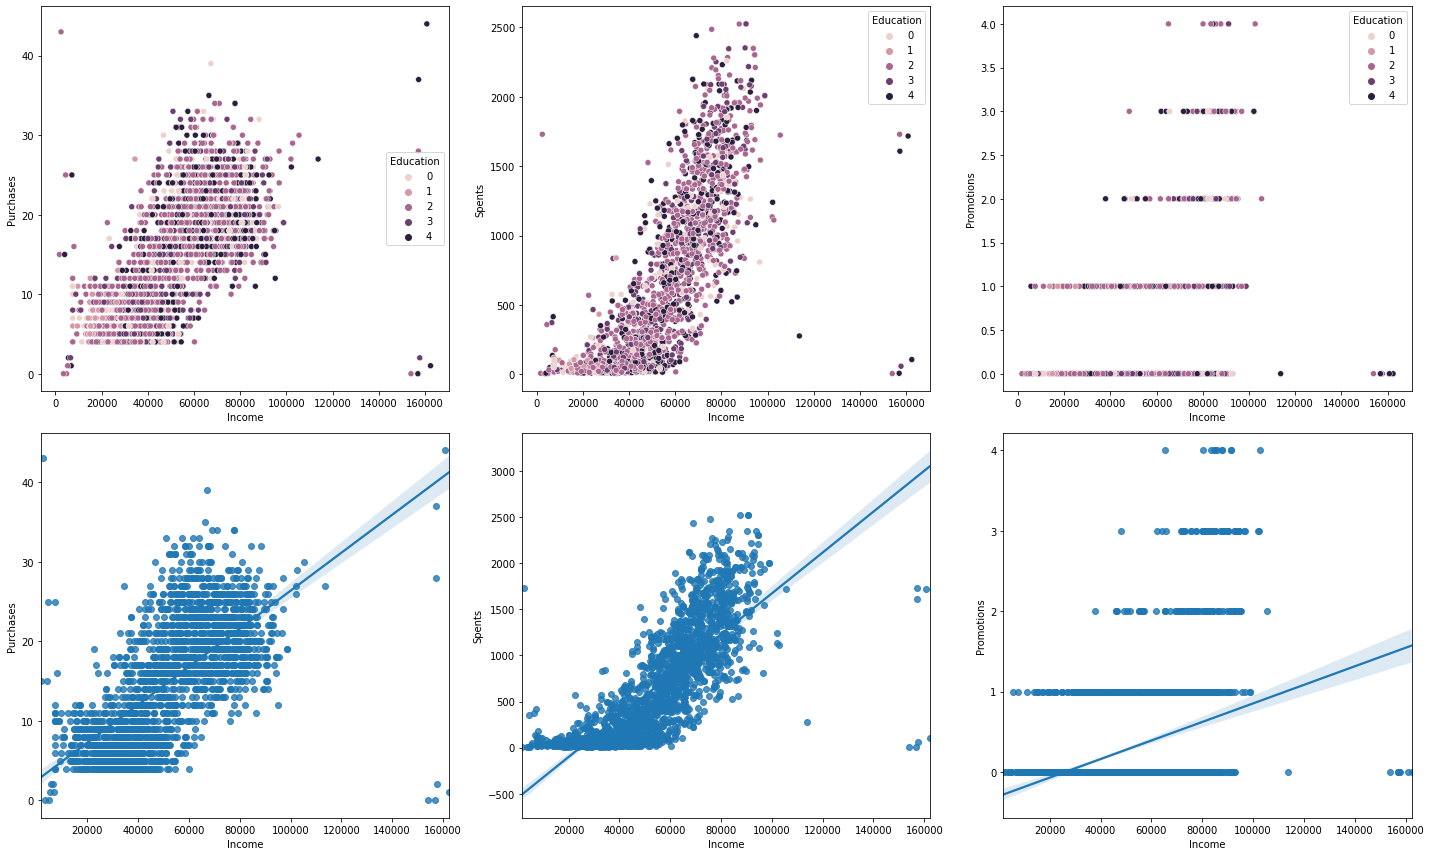

In [19]:
fig , ((ax1 , ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3, figsize=(20 , 12))

#scatterplots
sns.scatterplot(data = df, x = 'Income', y = 'Purchases', hue = 'Education', ax = ax1)
sns.scatterplot(data = df, x = 'Income', y = 'Spents', hue = 'Education', ax = ax2)
sns.scatterplot(data = df, x = 'Income', y = 'Promotions', hue = 'Education', ax = ax3)

#regplots
sns.regplot(data = df, x = 'Income', y = 'Purchases', ax = ax4)
sns.regplot(data = df, x = 'Income', y = 'Spents', ax = ax5)
sns.regplot(data = df, x = 'Income', y = 'Promotions', ax = ax6)

plt.tight_layout()

Since we don't have a target variable, we can't make use of a Feature Selection technique. We'll be using a Dimensionality Reduction technique called PCA (Principal Component Analysis) to define what is the best features to use on our dataset.

In [20]:
#fit StandartScaling
scale = StandardScaler()
scale.fit(df_num)
scale_df = pd.DataFrame(scale.transform(df_num), columns = df_num.columns )
scale_df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Dependents,Family,Purchases,Spents,Promotions
0,-0.350427,0.254106,0.287071,-0.822636,-0.929083,0.308159,0.976308,1.551835,1.688400,2.462525,...,1.429123,2.504812,-0.555672,0.692605,1.017591,-1.264421,-1.760789,1.317871,1.674797,-0.438681
1,-0.350427,0.254106,-0.260480,1.039697,0.908251,-0.383013,-0.871991,-0.637333,-0.718477,-0.651530,...,-1.126016,-0.571558,-1.170298,-0.132459,1.274151,1.404845,0.447081,-1.157791,-0.962758,-0.438681
2,-0.350427,1.194213,0.912665,-0.822636,-0.929083,-0.797716,0.357246,0.570483,-0.179158,1.345129,...,1.429123,-0.229740,1.288206,-0.544991,0.333431,-1.264421,-0.656854,0.796679,0.279713,-0.438681
3,-0.350427,1.194213,-1.174984,1.039697,-0.929083,-0.797716,-0.871991,-0.561845,-0.656077,-0.504986,...,-0.760996,-0.913377,-0.555672,0.280073,-1.291448,0.070212,0.447081,-0.897195,-0.919629,-0.438681
4,1.432021,-0.686001,0.294267,1.039697,-0.929083,1.552269,-0.392144,0.419506,-0.219273,0.154461,...,0.334064,0.112079,0.058954,-0.132459,-1.034889,0.070212,0.447081,0.536083,-0.307517,-0.438681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,-0.350427,-0.686001,0.430296,-0.822636,0.908251,-0.106544,1.195498,0.419506,0.065986,0.081189,...,1.794143,0.112079,-0.555672,-0.132459,0.162391,0.070212,0.447081,0.405785,1.216957,-0.438681
2201,1.432021,1.194213,0.559872,2.902029,0.908251,0.239042,0.298006,-0.662496,-0.611505,-0.688166,...,1.429123,-0.229740,-0.248359,0.692605,1.958310,2.739479,2.654952,0.926977,-0.271022,1.033605
2202,-0.350427,-1.626108,0.233356,-0.822636,-0.929083,1.448593,1.784939,0.545321,0.221988,-0.101991,...,-0.760996,0.112079,2.210144,0.280073,-1.034889,-1.264421,-1.760789,0.536083,1.051073,1.033605
2203,0.540797,1.194213,0.802727,-0.822636,0.908251,-1.419771,0.363170,0.092389,0.208616,0.777272,...,0.699084,0.795717,1.288206,-0.957523,1.103111,0.070212,0.447081,1.057275,0.390855,-0.438681


In [21]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scale_df)
pca_df = pd.DataFrame(pca.transform(scale_df), columns=(["col1","col2", "col3"]))
pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2205.0,-7.713658e-17,2.929359,-5.407582,-2.694978,-0.654868,2.532128,7.920389
col2,2205.0,-1.027145e-17,1.698080,-3.677257,-1.383925,-0.194729,1.221976,6.534481
col3,2205.0,1.691768e-17,1.195904,-4.159170,-0.818647,0.011112,0.769002,5.483184


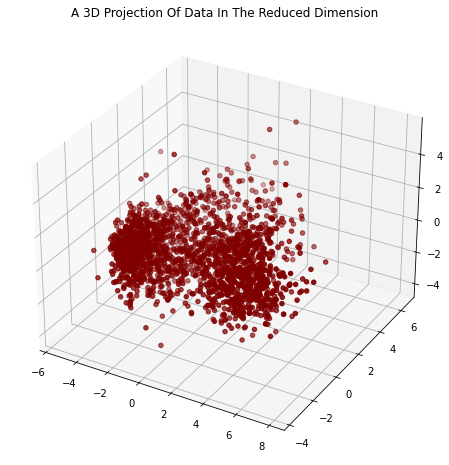

In [22]:
#Create Columns
x = pca_df["col1"]
y = pca_df["col2"]
z = pca_df["col3"]

#plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [23]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
y_ac = AC.fit_predict(pca_df)
pca_df["Clusters"] = y_ac
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"] = y_ac

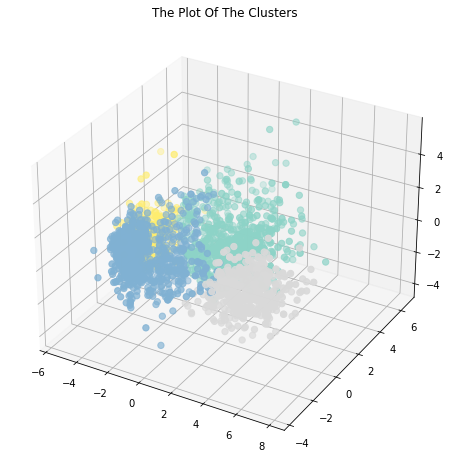

In [24]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c = pca_df["Clusters"], marker='o', cmap = 'Set3' )
ax.set_title("The Plot Of The Clusters")
plt.show()

Lets see how our clusters will perform

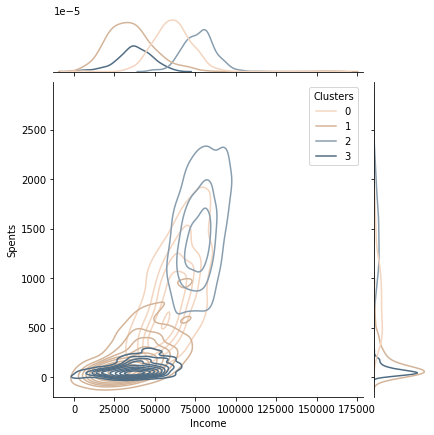

In [25]:
#base color for graphs
colors_cfc = ['#F3D5C0', '#D4B499', '#889EAF', '#506D84']

sns.jointplot(data = df, x = 'Income', y = 'Spents', hue = 'Clusters', kind = 'kde', palette = colors_cfc)

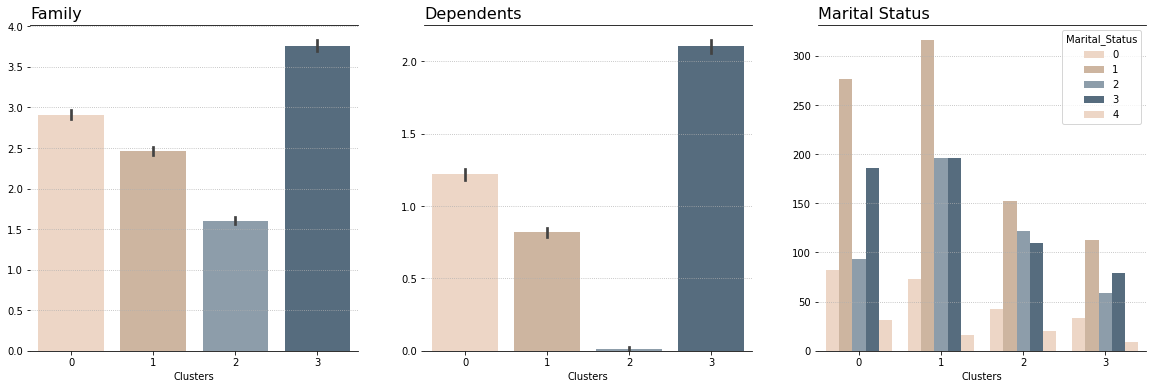

In [76]:
fig , (ax1 , ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20 , 6))

sns.barplot(data = df, x = 'Clusters', y = 'Family', palette = colors_cfc, ax = ax1)
sns.barplot(data = df, x = 'Clusters', y = 'Dependents', palette = colors_cfc, ax = ax2)
sns.countplot(data = df, x = 'Clusters', hue = 'Marital_Status', palette = colors_cfc, ax = ax3)

ax1.set_title('Family', fontsize = 16, loc = 'left')
ax1.set_ylabel('')
ax1.grid(axis = 'y',linestyle = 'dotted')
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax2.set_title('Dependents', fontsize = 16, loc = 'left')
ax2.set_ylabel('')
ax2.grid(axis = 'y',linestyle = 'dotted')
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax3.set_title('Marital Status', fontsize = 16, loc = 'left')
ax3.set_ylabel('')
ax3.grid(axis = 'y',linestyle = 'dotted')
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)


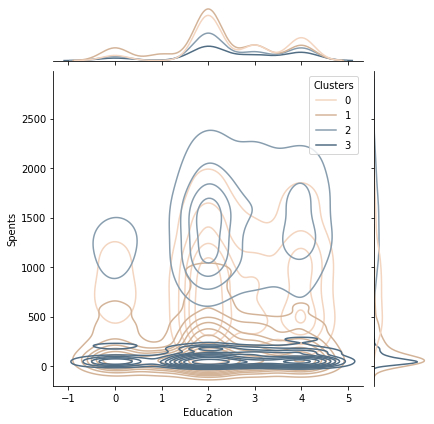

In [27]:
sns.jointplot(data = df, x = 'Education', y = 'Spents', hue = 'Clusters', kind = 'kde', palette = colors_cfc)

In [28]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Dependents', 'Family', 'Purchases',
       'Spents', 'Promotions', 'Clusters'],
      dtype='object')

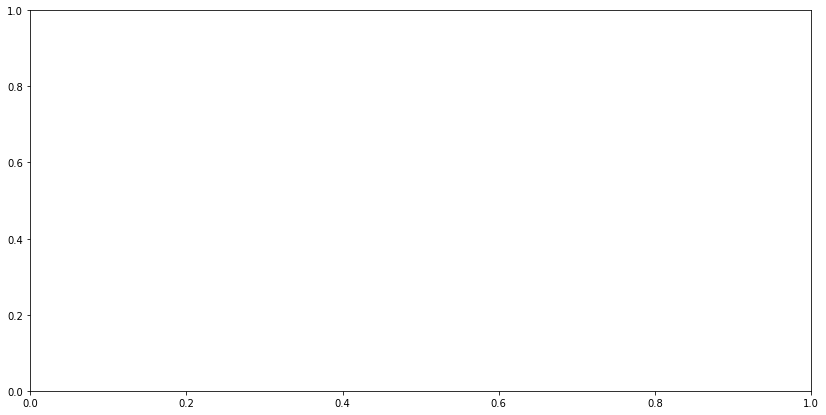

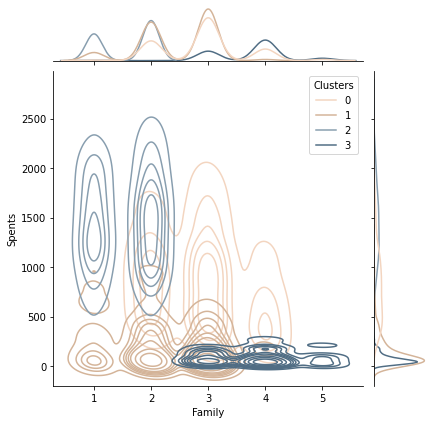

In [67]:
sns.jointplot(data = df, x = 'Family', y = 'Spents', hue = 'Clusters', kind = 'kde', palette = colors_cfc) 

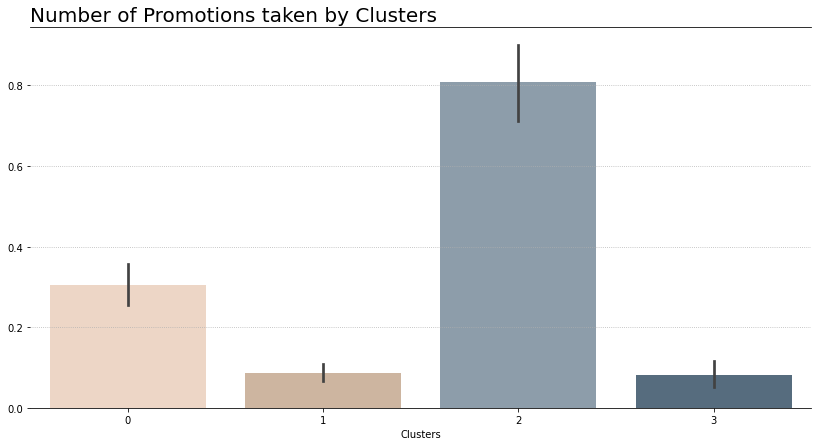

In [65]:
fig , ax = plt.subplots(figsize=(14 , 7))
sns.barplot(data = df, x = 'Clusters', y = 'Promotions', palette = colors_cfc)
ax.set_title('Number of Promotions taken by Clusters', fontsize = 20, loc = 'left')
ax.set_ylabel('')
ax.grid(axis = 'y',linestyle = 'dotted')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

Text(940.764705882353, 0.5, '')

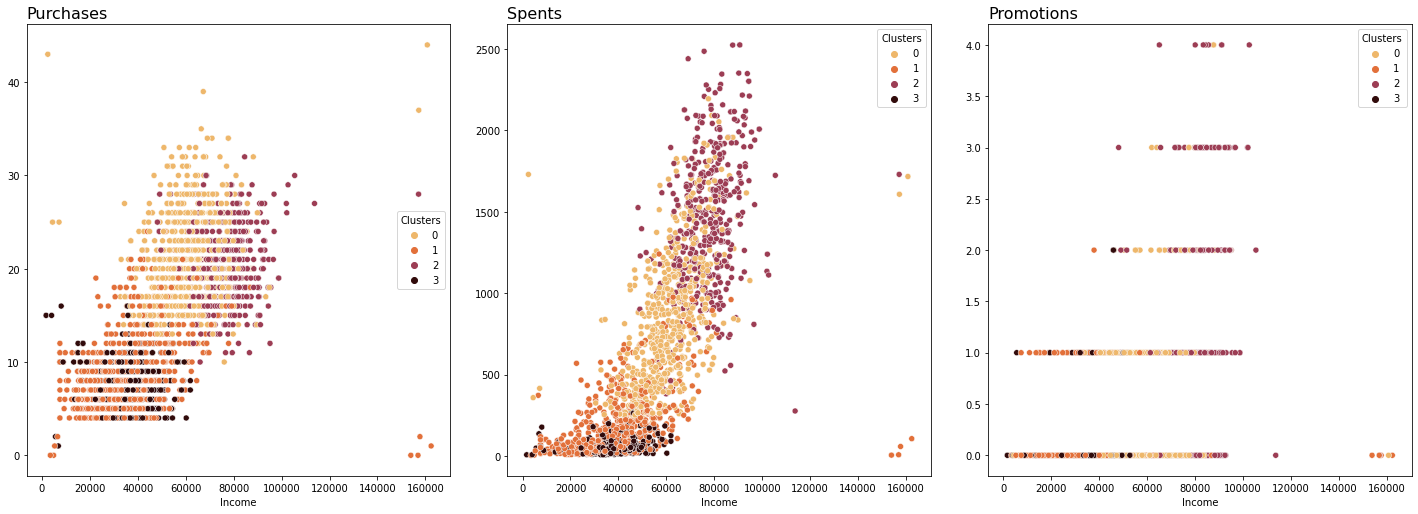

In [74]:
colors_ple = ['#EEB76B', '#E2703A', '#9C3D54', '#310B0B']

fig , (ax1 , ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20 , 7))

#scatterplots
sns.scatterplot(data = df, x = 'Income', y = 'Purchases', hue = 'Clusters', ax = ax1, palette = colors_ple)
sns.scatterplot(data = df, x = 'Income', y = 'Spents', hue = 'Clusters', ax = ax2, palette = colors_ple)
sns.scatterplot(data = df, x = 'Income', y = 'Promotions', hue = 'Clusters', ax = ax3, palette = colors_ple)

fig.tight_layout()

ax1.set_title('Purchases', fontsize = 16, loc = 'left')
ax1.set_ylabel('')

ax2.set_title('Spents', fontsize = 16, loc = 'left')
ax2.set_ylabel('')

ax3.set_title('Promotions', fontsize = 16, loc = 'left')
ax3.set_ylabel('')


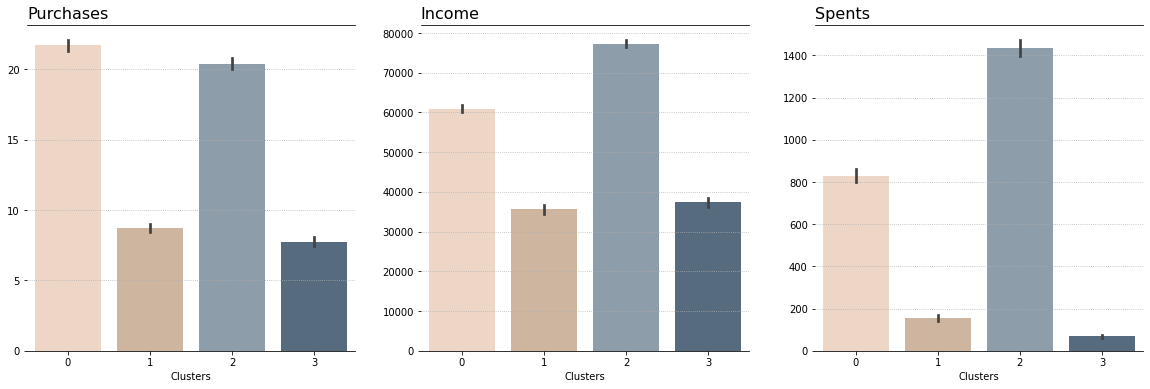

In [72]:
fig, (ax1 , ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20 , 6))

#scatterplots
sns.barplot(data = df, x = 'Clusters', y = 'Purchases', ax = ax1, palette = colors_cfc)
sns.barplot(data = df, x = 'Clusters', y = 'Income', ax = ax2, palette = colors_cfc)
sns.barplot(data = df, x = 'Clusters', y = 'Spents', ax = ax3, palette = colors_cfc)

ax1.set_title('Purchases', fontsize = 16, loc = 'left')
ax1.set_ylabel('')
ax1.grid(axis = 'y',linestyle = 'dotted')
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax2.set_title('Income', fontsize = 16, loc = 'left')
ax2.set_ylabel('')
ax2.grid(axis = 'y',linestyle = 'dotted')
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax3.set_title('Spents', fontsize = 16, loc = 'left')
ax3.set_ylabel('')
ax3.grid(axis = 'y',linestyle = 'dotted')
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

### Results

In [33]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Response,Age,Dependents,Family,Purchases,Spents,Promotions,Clusters
0,2,2,58138.0,0,0,58,635,88,546,172,...,0,0,1,64,0,1,25,1617,0,2
1,2,2,46344.0,1,1,38,11,1,6,2,...,0,0,0,67,2,3,6,27,0,3
2,2,3,71613.0,0,0,26,426,49,127,111,...,0,0,0,56,0,2,21,776,0,0
3,2,3,26646.0,1,0,26,11,4,20,10,...,0,0,0,37,1,3,8,53,0,1
4,4,1,58293.0,1,0,94,173,43,118,46,...,0,0,0,40,1,3,19,422,0,1
